In [1]:
from qiskit import *
from qiskit import *
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install qiskit


Note: you may need to restart the kernel to use updated packages.


In [4]:
from qiskit import *

In [5]:
circuit = QuantumCircuit(3,3)


circuit.x(0) # optional, we want to transfer state 1 in this example

circuit.barrier()

circuit.h(1)
circuit.cx(1,2)

circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [6]:
circuit = QuantumCircuit(3,3)
# QUBIT ORDERING
# q0 = State |psi> that we want to teleport
# q1 = Alice's half of the Bell pair
# q2 = Bob's half of the Bell pair, the destination of the teleportation

# ========================
# Step 0: Create the state to be teleported in qubit 0
circuit.x(0) # qubit 0 is now in state |1>, and this is the state that we want to teleport

circuit.barrier() # just a visual aid

# ========================
# Step 1: create an entangled Bell pair between Alice and Bob (qubits 1 and 2)
circuit.h(1)
circuit.cx(1,2)

circuit.barrier() # just a visual aid

# ========================
# Step 2: Alice applies a series of operations 
# between the state to teleport (qubit 0) and her half of the Bell pair (qubit 1)
circuit.cx(0,1)
circuit.h(0)

circuit.barrier() # just a visual aid

# ========================
# Step 3: Alice measures both qubits 0 and 1
circuit.measure([0, 1], [0, 1]) # results stored in classical bits 0 and 1, respectively

circuit.barrier() # just a visual aid

# ========================
# Step 4: Now that Alice has measured the two qubits, their states have collapsed to 0 and 1. 
# Bob can do operations conditioned on these qubits to his half of the Bell pair
# Note that while we're conditioning Bob's operation on the collapsed qubits 0 and 1, we can
# do teleportation over long distances by transmitting the classical information in classical bits 0 and 1
circuit.cx(1, 2)
circuit.cz(0, 2)

# Step 5: Done! Measure Bob's qubit to find out what state it is in
circuit.measure([2], [2]) 

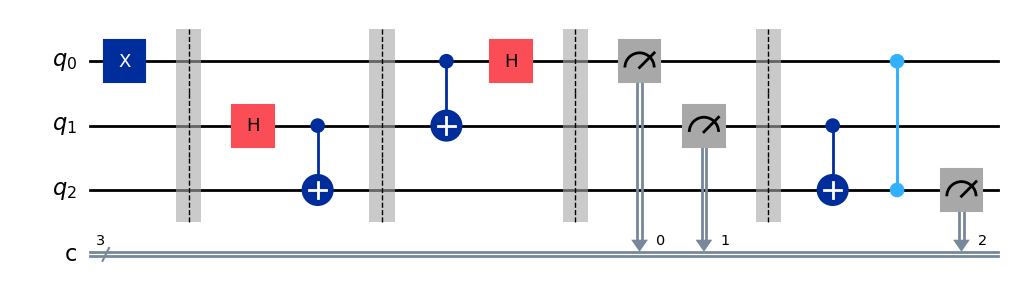

In [7]:
%matplotlib inline
circuit.draw(output='mpl')

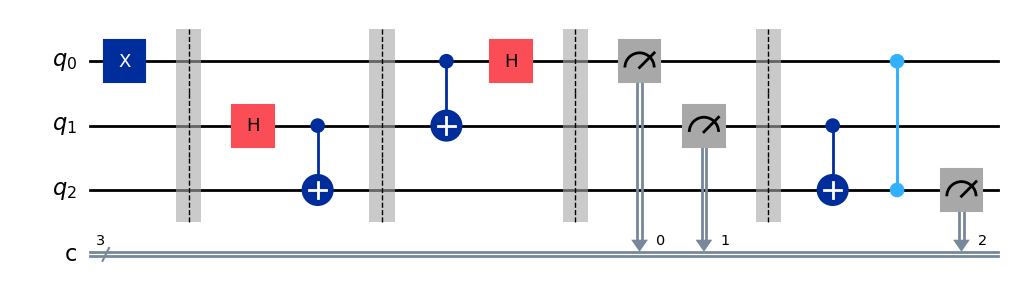

In [8]:
%matplotlib inline
circuit.draw(output='mpl')

{7: 0.237, 5: 0.263, 6: 0.26, 4: 0.24}


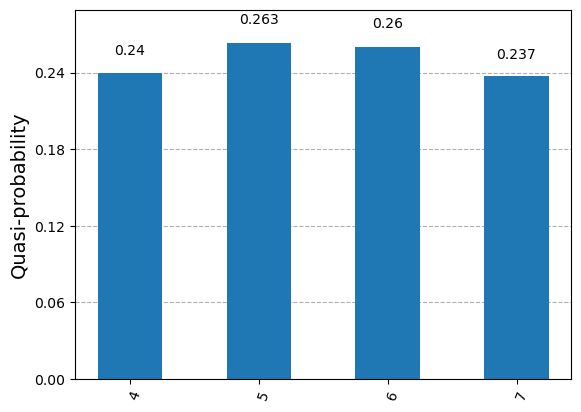

In [9]:
quasi_dist = Sampler().run(circuit, shots=1000).result().quasi_dists[0]
print(quasi_dist)
plot_histogram(quasi_dist)